# Introduction to Neural Networks
- McCulloch-Pitts Neuron (AND, OR, NOT)
- Linear Separability Visualization
- Perceptron Learning Rule (AND gate)
- Delta Rule using Gradient Descent


In [6]:
# McCulloch-Pitts Neuron for AND, OR, NOT
def mcp_neuron(inputs, weights, threshold):
    summation = sum([i*w for i, w in zip(inputs, weights)])
    return 1 if summation >= threshold else 0

In [7]:
# Truth table for AND
print("AND Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"Input: {x}, Output: {mcp_neuron(x, [1,1], 2)}")

AND Gate
Input: (0, 0), Output: 0
Input: (0, 1), Output: 0
Input: (1, 0), Output: 0
Input: (1, 1), Output: 1


In [8]:
# Truth table for OR
print("\nOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"Input: {x}, Output: {mcp_neuron(x, [1,1], 1)}")


OR Gate
Input: (0, 0), Output: 0
Input: (0, 1), Output: 1
Input: (1, 0), Output: 1
Input: (1, 1), Output: 1


In [9]:
# NOT Gate using single input
def not_gate(x):
    return mcp_neuron([x], [-1], 0)

In [10]:
print("\nNOT Gate")
for x in [0, 1]:
    print(f"Input: {x}, Output: {not_gate(x)}")


NOT Gate
Input: 0, Output: 1
Input: 1, Output: 0


In [11]:
# Linear Separability: Visualizing AND and XOR
import matplotlib.pyplot as plt

In [12]:
def plot_logic_gate(gate):
    X = [(0,0), (0,1), (1,0), (1,1)]
    y = []
    for a, b in X:
        if gate == 'AND':
            y.append(1 if a and b else 0)
        elif gate == 'XOR':
            y.append(1 if a ^ b else 0)
    colors = ['red' if val == 0 else 'green' for val in y]
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=colors)
    plt.title(f'{gate} Gate')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid(True)
    plt.show()

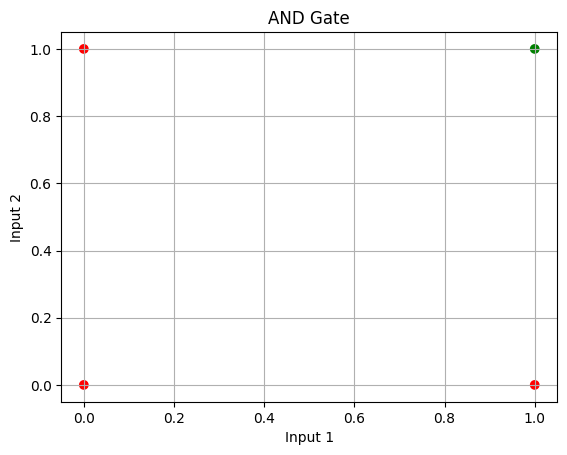

In [13]:
plot_logic_gate('AND')

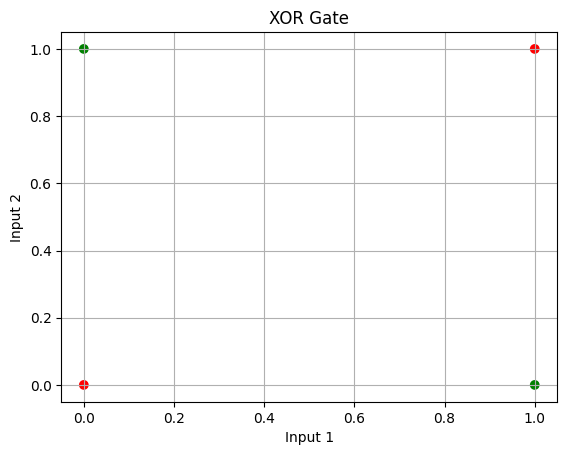

In [14]:
plot_logic_gate('XOR')

In [15]:
# Perceptron for AND Gate
import numpy as np

In [16]:
# Inputs and outputs for AND gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

In [17]:
# Initialize weights and bias
weights = np.zeros(2)
bias = 0
learning_rate = 0.1

In [18]:
# Training loop
for epoch in range(10):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = 1 if z > 0 else 0
        error = y[i] - pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
    print(f"Epoch {epoch+1}: Weights={weights}, Bias={bias}")

Epoch 1: Weights=[0.1 0.1], Bias=0.1
Epoch 2: Weights=[0.2 0.1], Bias=0.0
Epoch 3: Weights=[0.2 0.1], Bias=-0.1
Epoch 4: Weights=[0.2 0.2], Bias=-0.1
Epoch 5: Weights=[0.2 0.1], Bias=-0.2
Epoch 6: Weights=[0.2 0.1], Bias=-0.2
Epoch 7: Weights=[0.2 0.1], Bias=-0.2
Epoch 8: Weights=[0.2 0.1], Bias=-0.2
Epoch 9: Weights=[0.2 0.1], Bias=-0.2
Epoch 10: Weights=[0.2 0.1], Bias=-0.2


In [19]:
# Delta Rule using sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [21]:
# Dataset: simple binary classification
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [22]:
# Initialize weights
np.random.seed(42)
weights = 2 * np.random.random((2,1)) - 1

In [24]:
# Training
for epoch in range(10000):
    input_layer = X
    outputs = sigmoid(np.dot(input_layer, weights))
    error = y - outputs
    adjustments = error * sigmoid_derivative(outputs)
    weights += np.dot(input_layer.T, adjustments)

In [25]:
print("Final Weights:", weights)
print("Predictions:", sigmoid(np.dot(X, weights)))

Final Weights: [[-3.05311332e-16]
 [ 1.52655666e-16]]
Predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
